In [2]:
# Se importan los diferentes módulos que serán empleados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot

In [3]:
import os
os.getcwd()

'C:\\Users\\USUARIO\\Desktop\\Código'

In [4]:
sns.set() # Activar el módulo de seaborn para una visualización más estética

## Análisis de varianza para un solo factor

A continuación se presenta un ejeplo del uso de python como herramienta para realizar el análisis de varianza para un experimento con un solo factor. El experimento que se propone es:

* Una ingeniera encargada de la producción de películas plásticas sospecha que el tiempo de falla depende del tipo de material, por lo que usando su ingenio y conocimientos de estadística plantea un experimento diseñado. El experimento consiste en probar cinco diferentes tipos de material y replicarlo 5 veces. Los resultados después de hacer las pruebas se anexan.


### 1. Análisis descriptivo

Antes de realizar cualquier análisis, la ingeniera se plantea evaluar los datos mediante un análisis descriptivo, por lo que se apoya en gráficas y medidas de tendencia central/variabilidad para tener un primer acercamiento a sus resultados

In [10]:
# Importar datos

df = pd.read_excel("Ejemplo.xlsx")
df = pd.read_excel("Ejemplo_2.xlsx")

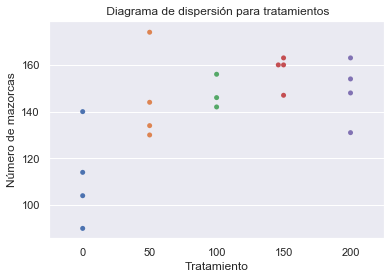

In [11]:
# Diagrama de dispersión por material

sns.swarmplot(x="Tratamiento", y="Mazorcas",data=df)       # Realizar el gráfico usando seaborn (sns)
plt.ylabel("Número de mazorcas")                          # Agregar nombre al eje y
plt.title(" Diagrama de dispersión para tratamientos");  # Agregar título al gráfico

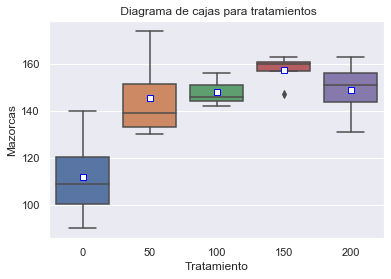

In [12]:
# Diagrama de caja por material

sns.boxplot(x="Tratamiento", y="Mazorcas",data=df,showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.ylabel("Mazorcas")
plt.title(" Diagrama de cajas para tratamientos");

In [13]:
# Se usa la función groupby para agrupar las observaciones y sirve para describir los grupos (tratamientos)

df["Medias"] = df.groupby(by="Tratamiento").transform("mean") # Crear una columna con las medias
df.groupby(by="Tratamiento").describe()

Mazorcas                                                         \
               count   mean        std    min     25%    50%     75%    max   
Tratamiento                                                                   
0                4.0  112.0  21.102922   90.0  100.50  109.0  120.50  140.0   
50               4.0  145.5  19.891372  130.0  133.00  139.0  151.50  174.0   
100              3.0  148.0   7.211103  142.0  144.00  146.0  151.00  156.0   
150              4.0  157.5   7.141428  147.0  156.75  160.0  160.75  163.0   
200              4.0  149.0  13.490738  131.0  143.75  151.0  156.25  163.0   

            Medias                                                 
             count   mean  std    min    25%    50%    75%    max  
Tratamiento                                                        
0              4.0  112.0  0.0  112.0  112.0  112.0  112.0  112.0  
50             4.0  145.5  0.0  145.5  145.5  145.5  145.5  145.5  
100            3.0  148.0  0.0  148.0  148.0  148.0  148.0  148.0  
150            4.0  157.5  0.0  157.5  157.5  157.5  157.5  157.5  
200            4.0  149.0  0.0  149.0  149.0  149.0  149.0  149.0

### 2. Análisis de varianza

Para el análisis de varianza se emplea el módulo de statsmodel el cual permite no solamente realizar el análisis de varianza, sino también las diferentes pruebas estadísticas para la verificación de supuestos

In [8]:
# Inicialmente se ajusta el modelo utilizando los mínimos cuadrados ordinarios (ols)

modelo = ols("Mazorcas ~ C(Tratamiento)", data=df).fit()  # Se indica que el tiempo de falla es explicado o relacionado por el material
anova = sm.stats.anova_lm(modelo, typ=2,)           # Se realiza el análisis de varianza. Typ determina la manera en que las sumas cuadras son calculadas
print(anova)                                       # Se imprime el análisis de varianza

                     sum_sq    df         F    PR(>F)
C(Tratamiento)  4913.789474   4.0  5.170855  0.009035
Residual        3326.000000  14.0       NaN       NaN


De acuerdo al estadístico F = 28.84 y el valor p = 0, se puede afirmar que existe diferencia significacitva en el tiempo de falla para los cinco materiales. Ahora el interés recae en determinar que materiales son diferentes y cuál es la mejor alternativa, pero antes es preciso evaluar el cumplimiento de los supuestos.

### 3. Pruebas de supuestos

### a. Normalidad

Tanto la normalidad como los demás supuestos pueden ser verificados empleando el análisis de los residuales y mediate herramientass gráficas o pruebas estadísticas formales

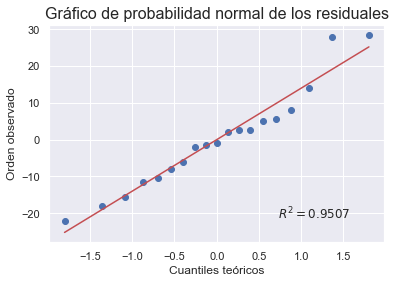

In [9]:
# Gráfico de probabilidad normal

normality_plot, stat = stats.probplot(modelo.resid, plot= plt, rvalue= True)

plt.title("Gráfico de probabilidad normal de los residuales", fontsize= 16)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Orden observado")

plt.show()

In [10]:
# Prueba estadística de Shapiro Wilks

SW = stats.shapiro(modelo.resid)
print(SW)

(0.9486793875694275, 0.3751887083053589)


### Homocedasticidad

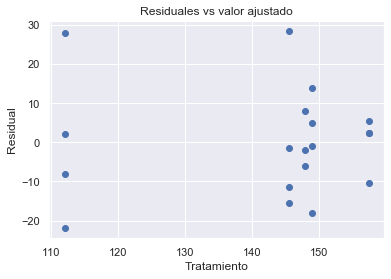

In [11]:
resid = modelo.resid
plt.scatter(df["Medias"],resid)
plt.xlabel("Tratamiento")
plt.ylabel("Residual")
plt.title("Residuales vs valor ajustado")
plt.show()

In [12]:
# Prueba de levene para supuesto de homocedasticidad

stats.levene(df['Mazorcas'][df['Tratamiento'] == 0],
             df['Mazorcas'][df['Tratamiento'] == 50],
             df['Mazorcas'][df['Tratamiento'] == 100],
             df['Mazorcas'][df['Tratamiento'] == 150],
             df['Mazorcas'][df['Tratamiento'] == 200])

LeveneResult(statistic=0.8984141053589821, pvalue=0.4908806475772971)

In [13]:
# Prueba de Barlett para evaluación de homocedasticidad

stats.bartlett(df['Mazorcas'][df['Tratamiento'] == 0],
             df['Mazorcas'][df['Tratamiento'] == 50],
             df['Mazorcas'][df['Tratamiento'] == 100],
             df['Mazorcas'][df['Tratamiento'] == 150],
             df['Mazorcas'][df['Tratamiento'] == 200])

BartlettResult(statistic=4.393333741297813, pvalue=0.3553833522636274)

### Independencia

In [14]:
import random

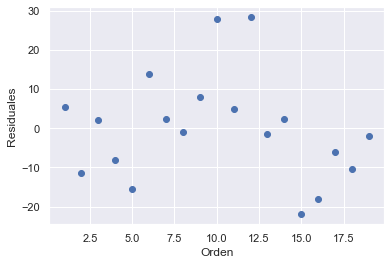

In [15]:
np.random.seed(6)

orden = random.sample(range(20),19)
plt.plot(orden, modelo.resid, marker=".", linestyle="none", markersize=12)
plt.xlabel("Orden")
plt.ylabel("Residuales")
plt.show()

## 4. Interpretación de resultados

In [14]:
import statsmodels.stats.multicomp as mc  # Se importa paquete para realizar comparaciones múltiples 

 ### Prueba de Tukey

In [17]:
comp = mc.MultiComparison(df["Mazorcas"], df["Tratamiento"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,50,33.5,0.054,-0.4657,67.4657,False
0,100,36.0,0.0556,-0.6872,72.6872,False
0,150,45.5,0.007,11.5343,79.4657,True
0,200,37.0,0.03,3.0343,70.9657,True
50,100,2.5,0.9,-34.1872,39.1872,False
50,150,12.0,0.7824,-21.9657,45.9657,False
50,200,3.5,0.9,-30.4657,37.4657,False
100,150,9.5,0.9,-27.1872,46.1872,False
100,200,1.0,0.9,-35.6872,37.6872,False
150,200,-8.5,0.9,-42.4657,25.4657,False


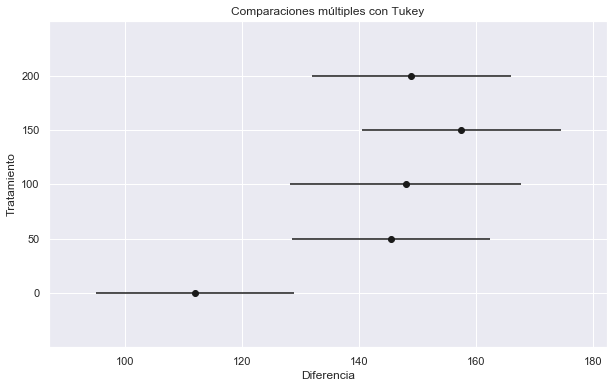

In [18]:
post_hoc_res.plot_simultaneous(ylabel="Tratamiento", xlabel="Diferencia")
plt.title("Comparaciones múltiples con Tukey");

### Prueba de Bonferroni

In [19]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
0,50,-2.3103,0.0602,0.6024,False
0,100,-2.7775,0.039,0.3902,False
0,150,-4.0846,0.0065,0.0647,False
0,200,-2.9545,0.0255,0.2546,False
50,100,-0.2037,0.8466,1.0,False
50,150,-1.1356,0.2994,1.0,False
50,200,-0.2912,0.7807,1.0,False
100,150,-1.7349,0.1433,1.0,False
100,200,-0.1148,0.913,1.0,False
150,200,1.1137,0.308,1.0,False
